#**Título:** Adquisición y adecuación de base de datos
#**Alumno:** JASSON JAIR MORA PUIN
#**Profesor:** JUAN CARLOS VALENCIA
#**Curso:** NRC-5835-Machine Learning
#**Fecha:** 24/05/2025


In [29]:
# Importar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# Definimos las urls de los datos
url_house_votes_ds = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
url_adult_ds = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Columnas del Dataset de house votes, según documento de referencia
house_votes_columns = [
    'Class Name:',
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'education_num',
    'marital',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-corporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa'
]
# Columnas del Dataset de adult, según documento de referencia
adult_columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_week',
    'native_country',
    'label'
]

# Cargamos al dataframe df_house los datos del Dataset correspondiente
df_house_votes = pd.read_csv(url_house_votes_ds, delimiter=',', header=None, names=house_votes_columns)
# Cargamos al dataframe df_adult los datos del Dataset correspondiente
df_adult = pd.read_csv(url_adult_ds, delimiter=',', header=None, names=adult_columns)

df_house_votes.head()



,Class Name:,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,NaN,NaN
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,NaN,NaN
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,NaN,NaN
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,NaN,NaN
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,NaN,NaN


In [30]:
#INICIO DE ANALISIS DE HOUSE VOTES

# Se evidencia que los datos de house votes tienen unos valores que deben ser analizados

# Crear un DataFrame con la información de tipos y valores únicos
column_info = pd.DataFrame({
    'Tipo de Dato': df_house_votes.dtypes,
    'Valores Únicos': [df_house_votes[col].unique() for col in df_house_votes.columns],
    'Conteo de Valores': [df_house_votes[col].value_counts().to_dict() for col in df_house_votes.columns]
})

# Mostrar el DataFrame
pd.set_option('display.max_colwidth', None) 
print(column_info)

# Eliminamos las columnas que no son necesarias, dado que todos sus valores son NaN, no hacen parte del análisis
df_house_votes = df_house_votes.drop(['duty-free-exports', 'export-administration-act-south-africa'], axis=1)

                                       Tipo de Dato          Valores Únicos  \
Class Name:                                  object  [republican, democrat]   
handicapped-infants                          object               [n, ?, y]   
water-project-cost-sharing                   object               [y, n, ?]   
adoption-of-the-budget-resolution            object               [n, y, ?]   
education_num                                object               [y, ?, n]   
marital                                      object               [y, ?, n]   
physician-fee-freeze                         object               [y, n, ?]   
el-salvador-aid                              object               [n, y, ?]   
religious-groups-in-schools                  object               [n, y, ?]   
anti-satellite-test-ban                      object               [n, y, ?]   
aid-to-nicaraguan-contras                    object               [y, n, ?]   
mx-missile                                   object 

In [31]:
# Dado que con excepción de la columna 'Class Name', todas las columnas son categóricas, se deben convertir a tipo numerico
# Cómo en todas las columnas se tienen 3 valores, se toma la decisión de reemplazar los valores de las columnas con '?' por np.nan, 'y' -> 1, 'n' -> 0
# Reemplazar '?' con NaN, 'y' con 1 y 'n' con 0, se considera que los valores de las columnas son binarios "Binary Variables" (Bishop, 2006, p. 68).
df_house_votes = df_house_votes.replace({
    '?': np.nan,
    'y': 1,
    'n': 0
})

# Verificar los cambios
df_house_votes.describe()

/tmp/ipykernel_606/893972240.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_house_votes = df_house_votes.replace({


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Análisis descriptivo para house votes de los datos que incluya las medidas de tendencia central, dispersión, asimetría y curtosis

# Crear un DataFrame con las estadísticas
stats_dict = {
    'Variable': [],
    'Media': [],
    'Mediana': [],
    'Moda': [],
    'Varianza': [],
    'Asimetría': [],
    'Curtosis': []
}
house_votes_categorical_columns = [col for col in df_house_votes.columns if col != 'Class Name:']

# Tratamiento de missing values, con la moda de cada columna
for col in df_house_votes.columns[1:]: 
    df_house_votes[col].fillna(df_house_votes[col].mode()[0], inplace=True)


# Calcular estadísticas para cada variable
for var in house_votes_categorical_columns:
    stats_dict['Variable'].append(var)
    stats_dict['Media'].append(f"{df_house_votes[var].mean():.2f}")
    stats_dict['Mediana'].append(f"{df_house_votes[var].median():.2f}")
    stats_dict['Moda'].append(f"{df_house_votes[var].mode()[0]:.2f}")
    stats_dict['Varianza'].append(f"{df_house_votes[var].var():.2f}")
    stats_dict['Asimetría'].append(f"{skew(df_house_votes[var]):.2f}")
    stats_dict['Curtosis'].append(f"{kurtosis(df_house_votes[var]):.2f}")

# Crear el DataFrame
stats_df = pd.DataFrame(stats_dict)

# Mostrar el DataFrame con formato
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)  # Ajustar el ancho de la pantalla
print(stats_df)

                             Variable Media Mediana  Moda Varianza Asimetría  \
0                 handicapped-infants  0.43    0.00  0.00     0.25      0.28   
1          water-project-cost-sharing  0.56    1.00  1.00     0.25     -0.24   
2   adoption-of-the-budget-resolution  0.61    1.00  1.00     0.24     -0.44   
3                       education_num  0.41    0.00  0.00     0.24      0.38   
4                             marital  0.52    1.00  1.00     0.25     -0.09   
5                physician-fee-freeze  0.65    1.00  1.00     0.23     -0.63   
6                     el-salvador-aid  0.58    1.00  1.00     0.24     -0.33   
7         religious-groups-in-schools  0.59    1.00  1.00     0.24     -0.37   
8             anti-satellite-test-ban  0.53    1.00  1.00     0.25     -0.11   
9           aid-to-nicaraguan-contras  0.51    1.00  1.00     0.25     -0.05   
10                         mx-missile  0.34    0.00  0.00     0.23      0.65   
11                        immigration  0

/tmp/ipykernel_606/1154672504.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_house_votes[col].fillna(df_house_votes[col].mode()[0], inplace=True)


In [33]:
# Validar si hay duplicados en las filas
hay_duplicados = df_house_votes.duplicated().any()
print("¿Hay filas duplicadas?", hay_duplicados)

¿Hay filas duplicadas? True


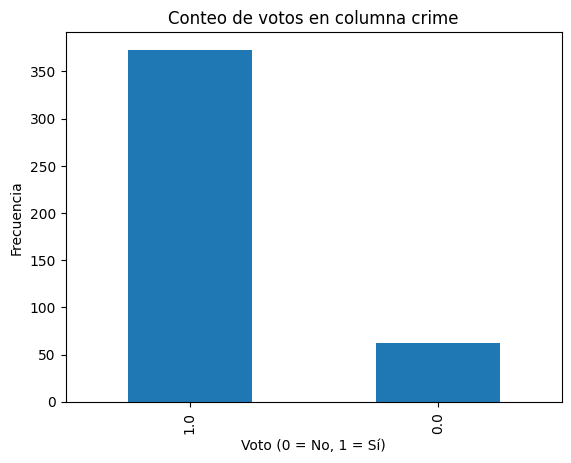

In [34]:
# Gráfico de distribución de votos columna crime, se usa diagrama de barras para visualizar la distribución de votos
df_house_votes['crime'].value_counts().plot(kind='bar')
plt.title('Conteo de votos en columna crime')
plt.xlabel('Voto (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.show()

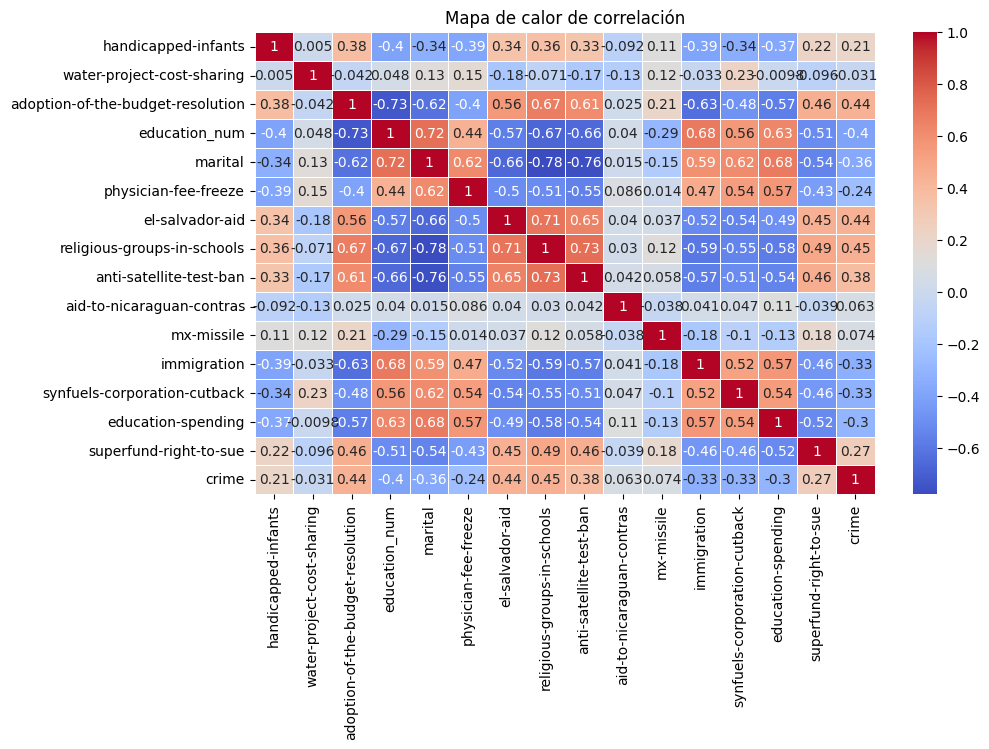

In [35]:
# Gráfico de mapa de calor de correlación, se usa para visualizar la correlación entre las variables, excluyendo la columna 'Class Name:'
plt.figure(figsize=(10, 6))
sns.heatmap(df_house_votes.drop('Class Name:', axis=1).corr(), 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()

#FIN DE ANALISIS DE HOUSE VOTES

In [36]:
#INICIO DE ANALISIS DE ADULT DATASET

#Análisis descriptivo de los datos que incluya las medidas de tendencia central.
df_adult.head()
# SE EVIDENCIAN LAS 6 VARIBLES CONTINUAS



,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
# Verificar si hay valores nulos
df_adult.isnull().sum()
# Se evidencia que no hay valores nulos, por lo que no se requiere tratamiento

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_week        0
native_country    0
label             0
dtype: int64

In [38]:
# Validar si hay duplicados en las filas
hay_duplicados = df_adult.duplicated().any()
print("¿Hay filas duplicadas?", hay_duplicados)
# Se evidencian duplicados, se toma la decisión de eliminarlos
df_adult = df_adult.drop_duplicates()

# Se eliminan los valores de las variables que no son relevantes para el análisis, si es que existen
df = df_adult[(df_adult['age'] > 0) & (df_adult['fnlwgt'] > 0) ]

# No sé como determinar la validez de hours_week, por lo que se deja como está


¿Hay filas duplicadas? True


In [39]:
# Verificar los cambios
df_adult.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
# Análisis descriptivo para adult de los datos que incluya las medidas de tendencia central, dispersión, asimetría y curtosis

# Crear un DataFrame con las estadísticas
stats_dict = {
    'Variable': [],
    'Media': [],
    'Mediana': [],
    'Moda': [],
    'Varianza': [],
    'Asimetría': [],
    'Curtosis': []
}
adult_continuous_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_week']


# Calcular estadísticas para cada variable
for var in adult_continuous_columns:
    stats_dict['Variable'].append(var)
    stats_dict['Media'].append(f"{df_adult[var].mean():.2f}")
    stats_dict['Mediana'].append(f"{df_adult[var].median():.2f}")
    stats_dict['Moda'].append(f"{df_adult[var].mode()[0]:.2f}")
    stats_dict['Varianza'].append(f"{df_adult[var].var():.2f}")
    stats_dict['Asimetría'].append(f"{skew(df_adult[var]):.2f}")
    stats_dict['Curtosis'].append(f"{kurtosis(df_adult[var]):.2f}")

# Crear el DataFrame
stats_df = pd.DataFrame(stats_dict)

# Mostrar el DataFrame con formato
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)  # Ajustar el ancho de la pantalla
print(stats_df)

        Variable      Media    Mediana       Moda        Varianza Asimetría  \
0            age      38.59      37.00      36.00          185.99      0.56   
1         fnlwgt  189780.85  178356.00  123011.00  11142168571.98      1.45   
2  education_num      10.08      10.00       9.00            6.61     -0.31   
3   capital_gain    1078.44       0.00       0.00     54581914.90     11.95   
4   capital_loss      87.37       0.00       0.00       162491.09      4.59   
5     hours_week      40.44      40.00      40.00          152.45      0.23   

  Curtosis  
0    -0.17  
1     6.22  
2     0.62  
3   154.66  
4    20.35  
5     2.92  


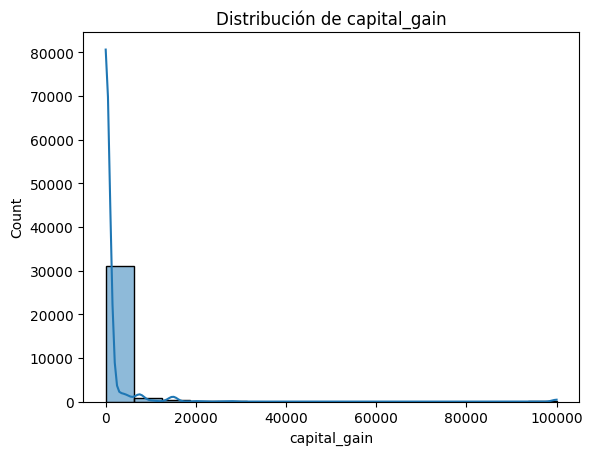

In [41]:
# Vamos a validar la columna capital_gain, se le aplicará el mismo tratamiento que se le aplicará a capital_loss
sns.histplot(df_adult['capital_gain'], kde=True)
plt.title('Distribución de capital_gain')
plt.show()

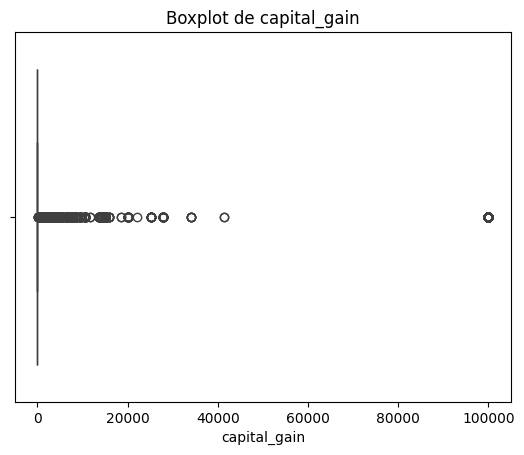

In [42]:
# Ahora se visualiza el boxplot de capital_gain para validar si hay outliers
sns.boxplot(x=df_adult['capital_gain'])
plt.title('Boxplot de capital_gain')
plt.show()

Asimetría original de capital_gain: 11.948851942756669
Asimetría corregida de capital_gain: 3.0945241229564484

Asimetría original de capital_loss: 4.592490690725554
Asimetría corregida de capital_loss: 4.305502483132487


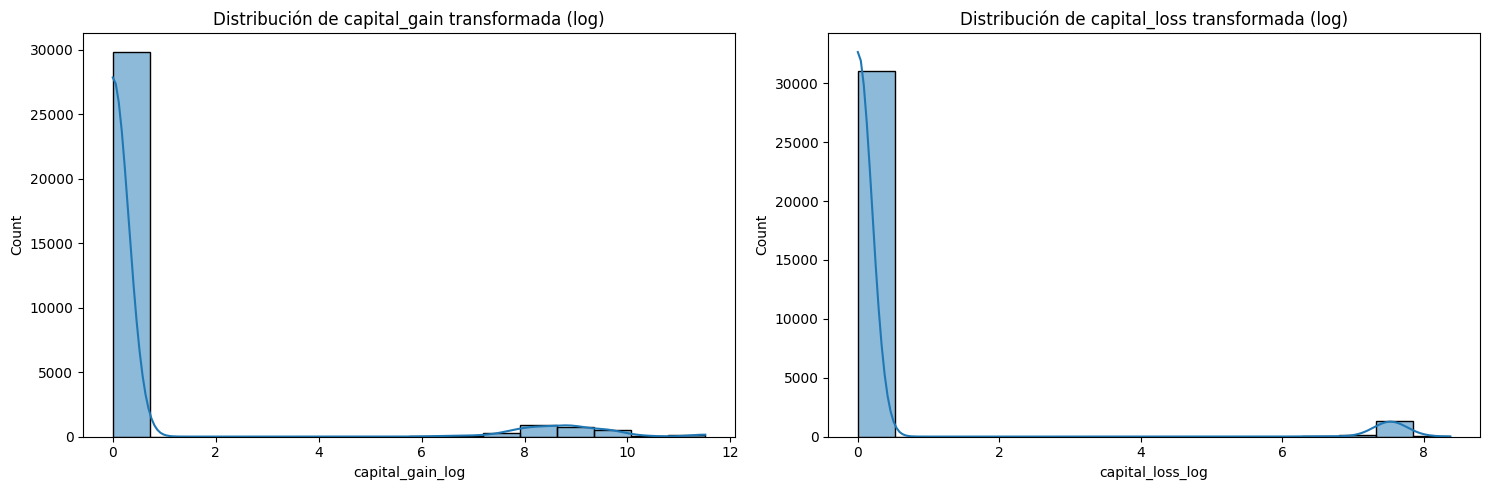

In [43]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Capital Gain
print("Asimetría original de capital_gain:", skew(df_adult['capital_gain']))
df_adult['capital_gain_log'] = np.log(df_adult['capital_gain'] + 1) 
print("Asimetría corregida de capital_gain:", skew(df_adult['capital_gain_log']))

# Capital Loss
print("\nAsimetría original de capital_loss:", skew(df_adult['capital_loss']))
df_adult['capital_loss_log'] = np.log(df_adult['capital_loss'] + 1) 
print("Asimetría corregida de capital_loss:", skew(df_adult['capital_loss_log']))

# Gráficos
sns.histplot(df_adult['capital_gain_log'], kde=True, ax=ax1)
ax1.set_title("Distribución de capital_gain transformada (log)")

sns.histplot(df_adult['capital_loss_log'], kde=True, ax=ax2)
ax2.set_title("Distribución de capital_loss transformada (log)")

plt.tight_layout()
plt.show()

# Desde mi punto de vista, aunque la asimetría de capital_gain se redujo de manera considerable, las gráficas demuestran la misma tendencia que la variable original

In [44]:
# Transformar las variables capital_gain y capital_loss a variables binarias
df_adult['capital_gain_bin'] = df_adult['capital_gain'].apply(lambda x: 1 if x > 0 else 0)
df_adult['capital_loss_bin'] = df_adult['capital_loss'].apply(lambda x: 1 if x > 0 else 0)



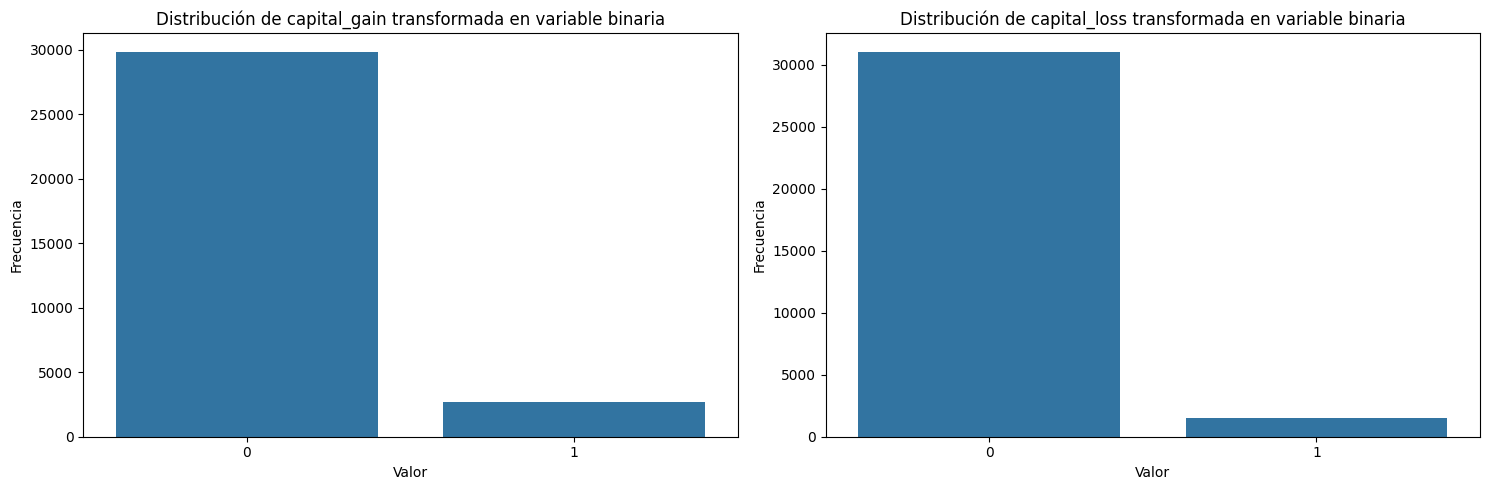

In [45]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Como son variables binarias, se plotea grafico de barras
# Gráficos de barras
sns.barplot(x=df_adult['capital_gain_bin'].value_counts().index, 
            y=df_adult['capital_gain_bin'].value_counts().values, 
            ax=ax1)
ax1.set_title("Distribución de capital_gain transformada en variable binaria")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")

sns.barplot(x=df_adult['capital_loss_bin'].value_counts().index, 
            y=df_adult['capital_loss_bin'].value_counts().values, 
            ax=ax2)
ax2.set_title("Distribución de capital_loss transformada en variable binaria")
ax2.set_xlabel("Valor")
ax2.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

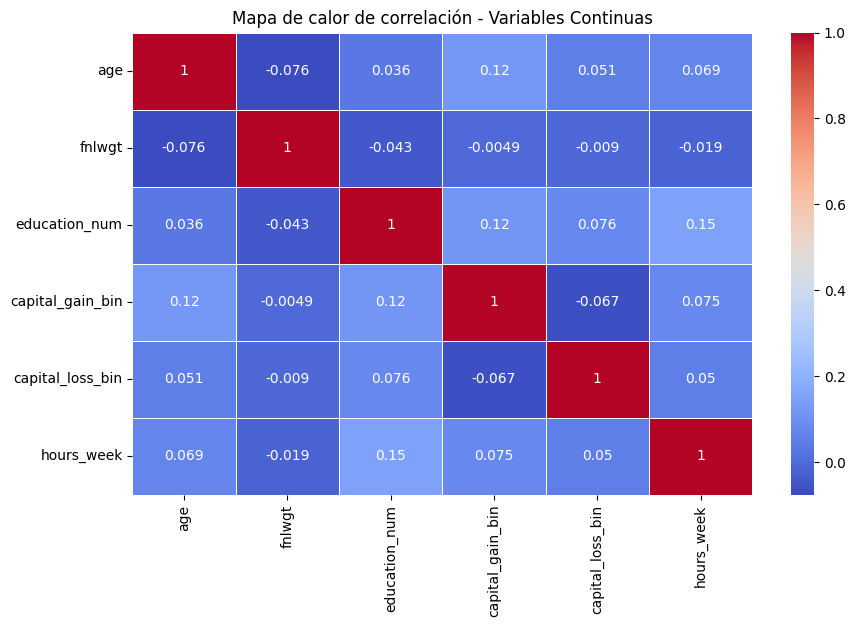

In [47]:
# Gráfico de mapa de calor de correlación, se usa para visualizar la correlación entre las variables 
adult_continuous_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain_bin', 'capital_loss_bin', 'hours_week']

plt.figure(figsize=(10, 6))
sns.heatmap(df_adult[adult_continuous_columns].corr(), 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5)
plt.title("Mapa de calor de correlación - Variables Continuas")
plt.show()

#FIN DE ANALISIS DE ADULT DATASET

# ** COMENTARIOS A RESULTADOS OBTENIDOS **


# DATAFRAME df_house_votes
1. Se evidencian columnas en el documento de referencia que no hacer parte del Dataset, se eliminan para el análisis.
2. Se identifican repetidos, pero como es una votación y dos o más personas pueden votar igual, no deberían eliminarse.
3. Se identifican las variables como binarias "Binary Variables" (Bishop, 2006, p. 68). casi todas las columnas del Dataset
4. Las columnas con variables binarias no deberían tener outliers
5. Se evidencia una alta correlación positiva entre las columnas ('marital' y 'education_num'), ('religious-groups-in-schools' y 'el-salvador-aid ) y ('anti-satellite-test-ban' y 'religious-groups-in-schools')

# DATAFRAME df_adult
1. El Dataset no tiene nulos, entonces no necesita tratamiento de missing.
2. Se toma la decisión de eliminar duplicados, entendiendo qué el Dataset está diseñado para predecir si una persona gana más de 50K USD al año.
3. Considero que me falta capacidad de análisis para eliminar datos no relevantes, veo que el rango de hours_week es muy grande, no sé si son relevantes datos con 1 hora de trabajo a la semana o 99 horas
4. Del boxplot de la variable capital_gain previo al tratamiento, se infiere que basicamente todo lo que no sea 0 debe ser un outlier, este análisis aplica también para la variable capital_loss.
5. Las variables capital_gain y capital_loss, tienen en 25%, 50%, 75% el valor 0, por lo tanto, son distribuciones muy sesgadas, se aplica sobre ellas la normalización log.
6. Aplicar el tratamiento log para la asimetría de las variables capital_gain y capital_loss no produjo un impacto significativo, se decide entonces transformar las variables a variables binarias "Binary Variables" (Bishop, 2006, p. 68), donde el modelo simplemente sepa si tuvo o no ganancia/pérdida la persona.
7. No se evidencia ninguna correlación fuerte entre las variables.
8. Me llama la atención la variable fnlwgt, si esta se refiere a peso final de la persona creo qué se debería descartar del Dataframe, si bien cumple como variable continua, tiene un contexto diferente al resto de variables, que están orientadas, a dedicación, ganancia/pérdida y demás, el peso en ese caso no sería relevante para un entrenamiento.





# REFERENCIAS
Bishop, C. (2006). Pattern Recognition and Machine Learning. Information Science and Statistics.